# ЛАБОРАТОРНАЯ РАБОТА 1
# Выборочный метод

### Цель работы: 
Представление выборочных данных в виде статистического ряда, вычисление выборочных характеристик, графическая иллюстрация статистических рядов, проверка гипотез о законе распределения в пакете STATISTICA.

### Задание 1

1.	Дана выборка ответов на вопросы социологического анкетирования 400 пенсионеров Томской области, представленная в виде числовых кодов ответов, соответствующих номеру ответа (файл “Данные”, лист “Ответы”). В соответствии с вариантом задания, для выборочного множества ответов на указанный вопрос анкеты (файл “Анкета.doc”) построить статистический ряд, гистограмму, вычислить моду, медиану, квартили и квантили уровней   и   (если данные параметры имеют смысл для данного набора данных).

### Вариант 2

In [63]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import scipy.stats as stats
import statsmodels.api as sm
from pylab import plt, mpl
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
df_task1 = pd.DataFrame({'№_вопроса' : ['в14'],
                        'параметра_alpha': [0.15],
                        'параметр_beta' : [0.9]})
df_task1

,№_вопроса,параметра_alpha,параметр_beta
0,в14,0.15,0.9


## Загрузка данных

In [4]:
data = pd.read_excel('LAB_DATA.xlsx', sheet_name=0)
data

,в1,в2_1,в2_2,в2_3,в2_4,в2_5,в2_6,в2_7,в2_8,в2_9,...,в71да_5,в71да_6,в71да_др,в72,в74,в75,в76,в78,в78_1,нас.пункт
0,1,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,2,4,4,1,1,Томск
1,3,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,2,4,4,1,1,Томск
2,1,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,2,3,1,1,1,Томск
3,3,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,1.0,нет жилья,1.0,3,4,1,1,1,Томск
4,3,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,2,3,1,1,1,Томск
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,3,4,1,3,8,Тегульдетский район
396,3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2,4,1,3,8,Тегульдетский район
397,2,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,2,4,4,3,8,Тегульдетский район
398,2,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,3,4,1,3,8,Тегульдетский район


### Построение статистического ряда для вопроса
#### Обращались ли Вы и как часто за медицинской помощью за последние 12 месяцев? 

In [5]:
# Проверка на пропуски
if data[df_task1.loc[0][0]].isna().sum() == 0:
    print('Пропущенных ответов в данном вопросе у респондентов нет')
else:
    print('В данных есть пропуски')

Пропущенных ответов в данном вопросе у респондентов нет


In [6]:
# Сделаем группировку по количеству ответов на разные вопросы
data_agg = data.groupby('в14', as_index=False)['в14'].agg(['count']).reset_index()

# Создадим датафрейм с вопросами
df_vop = pd.DataFrame({'Вопрос': ['Раз в неделю или чаще',
                                  'Один-два раза в месяц',
                                  'Один-два раза в полгода', 
                                  'Один раз за год',
                                  'Не обращались']})
# Соеденим оба датафрейма
df_stat_row = df_vop.merge(data_agg, left_index=True, right_index=True)
# Переименуем столбец 
df_stat_row.rename(columns = {'count' : 'Частота', 'в14': 'Категория'}, inplace=True)
# создадим столбец с кумулятой
df_stat_row['Кумулята'] = df_stat_row['Частота'].cumsum()
df_stat_row['Процент частоты, %'] = df_stat_row['Частота'] / 400 * 100
df_stat_row['Процент кумуляты, %'] = df_stat_row['Кумулята'] / 400 * 100
df_stat_row[['Категория', 'Вопрос', 'Частота', 'Кумулята', 'Процент частоты, %', 'Процент кумуляты, %']]
df_stat_row

,Вопрос,Категория,Частота,Кумулята,"Процент частоты, %","Процент кумуляты, %"
0,Раз в неделю или чаще,1,19,19,4.75,4.75
1,Один-два раза в месяц,2,87,106,21.75,26.50
2,Один-два раза в полгода,3,109,215,27.25,53.75
3,Один раз за год,4,101,316,25.25,79.00
4,Не обращались,5,84,400,21.00,100.00


### Построение гистограммы

Text(0.5, 1.0, 'распределение ответов респондентов по вопросу: в14')

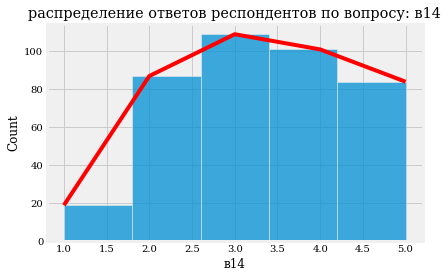

In [7]:
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
sns.histplot(data['в14'], bins=5)
sns.lineplot(x='Категория', y='Частота', data=df_stat_row, color='red')
plt.title(f'распределение ответов респондентов по вопросу: {df_task1.loc[0][0]}')

### вычислить моду, медиану, квартили и квантили уровней   и   (если данные параметры имеют смысл для данного набора данных).

In [8]:
df_stat1 = pd.DataFrame({'Мода': [data[df_task1.loc[0][0]].mode()[0]],
             'Медиана': [data[df_task1.loc[0][0]].median()],
             'Среднее' : [data[df_task1.loc[0][0]].mean()],
             'Стандартное отклонение': data[df_task1.loc[0][0]].std(),
             '25%' : data['в14'].describe()[4],
             '50%' : data['в14'].describe()[5],
             '75%' : data['в14'].describe()[6],
             '15%' : data[df_task1.loc[0][0]].quantile(0.15),
             '90%' : data[df_task1.loc[0][0]].quantile(0.9)}).T
df_stat1.rename(columns={0:'Статистика'}, inplace=True)
df_stat1

,Статистика
Мода,3.000000
Медиана,3.000000
Среднее,3.360000
Стандартное отклонение,1.172107
25%,2.000000
50%,3.000000
75%,4.000000
15%,2.000000
90%,5.000000


### Задание 2
2.	Используя выборку ответов на вопросы анкеты, указанную в задании 1, построить таблицу сопряженности и соответствующую гистограмму для двух признаков (ответов на вопросы анкеты), указанных в варианте задания. Сделать вывод о возможной зависимости (независимости) признаков.

### Исходные данные

In [9]:
df_task2 = pd.DataFrame({'№_вопроса_1' : ['в13'],
                        '№_вопроса_2' : ['в66']})
df_task2

,№_вопроса_1,№_вопроса_2
0,в13,в66


### Вопрос 13
`Как Вы оцениваете Ваше здоровье в сравнении со здоровьем Ваших сверстников?`

1.	Очень хорошее
2.	Хорошее
3.	Среднее (не хорошее, но и не плохое)
4.	Плохое
5.	Очень плохое
6.	Затрудняюсь ответить


### Вопрос 66
Укажите, пожалуйста, Ваш пол:
1.	Мужской
2.	Женский


In [11]:
df_cross = pd.crosstab(data[df_task2.loc[0][0]], data[df_task2.loc[0][1]]).reset_index()
df_cross = df_cross.rename(columns = {1: 'Мужской',
                                      2: 'Женский'})
df_cross

в66,в13,Мужской,Женский
0,1,3,1
1,2,27,31
2,3,78,157
3,4,26,54
4,5,8,10
5,6,1,4


#### Построение гистограммы

Text(0.5, 1.0, 'Гистограмма рапределения ответов \nу мужчин и женщин на вопрос 13')

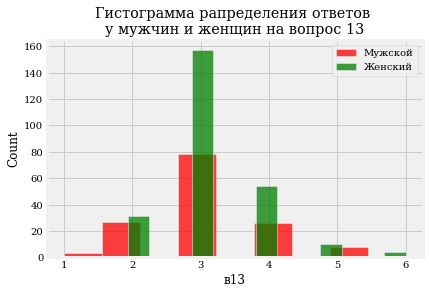

In [12]:
sns.histplot(data[data[df_task2.loc[0][1]] == 1][df_task2.loc[0][0]], color = 'red', label='Мужской')
sns.histplot(data[data[df_task2.loc[0][1]] == 2][df_task2.loc[0][0]], color = 'green', label='Женский')
plt.legend()
plt.title('Гистограмма рапределения ответов \nу мужчин и женщин на вопрос 13')

### Вывод

Большинство мужчин как и женщин считают, что их здоровье среднее не хорошее и не плохое

### Задание 2

3.	В файле “Данные” на листе “Котировки” приведены цены закрытия акций на ММВБ за период с 01.01.2015 по 01.09.2015 с периодичностью 1 день. Для указанной в варианте ценной бумаги, получить выборку относительных приращений котировок, представить ее в виде интервального статистического ряда, построить гистограмму, вычислить выборочные среднее, стандартное отклонение, эксцесс, коэффициент асимметрии. Построить доверительный интервал для математического ожидания генеральной совокупности, соответствующий доверительной вероятности  . Проверить гипотезу о распределении данных по нормальному закону. В случае, если гипотеза о нормальности отвергается, попробовать подобрать для данных другие распределения.

#### Исходные данные для задания 3

In [13]:
df_task3 = pd.DataFrame({'Наим.Акции' : ['AFLT'],
                        'параметр beta' : ['0.84']})
df_task3

,Наим.Акции,параметр beta
0,AFLT,0.84


#### Загрузка данных для задания 3

In [14]:
data2 = pd.read_excel('LAB_DATA.xlsx', sheet_name=1)
data2

,Дата,ROSN,AFLT,BANEP,VTBR,GAZP,GMNK,SIBN,LKON,MTSS,...,PLZL,RBSM,RUALR,SBER,SNGS,NVTK,TATN,RTKM,ODVA,RASP
0,20150105,196.75,33.21,935,0.06750,133.95,8590,142.0,2295.0,174.70,...,1000.5,3.625,385.7,56.37,24.240,455.5,238.00,91.44,0.1055,23.15
1,20150106,200.30,33.07,926,0.06666,138.92,9101,144.6,2345.0,179.90,...,1047.0,3.790,397.9,58.28,25.015,476.7,228.75,95.28,0.1195,23.43
2,20150108,214.95,35.17,956,0.06741,146.46,9550,148.1,2572.0,190.05,...,1060.0,3.875,403.6,65.70,26.265,483.0,245.00,90.10,0.1230,24.25
3,20150109,206.60,34.00,938,0.06531,141.70,9740,146.6,2461.0,195.00,...,1050.0,4.045,406.4,63.10,25.650,475.1,234.05,89.03,0.1195,23.80
4,20150112,204.00,34.45,935,0.06353,140.22,9839,143.1,2477.0,193.00,...,1020.0,3.885,411.9,62.90,25.450,470.7,228.25,88.80,0.1155,23.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,20150827,245.50,38.80,1324,0.06985,144.60,10371,145.5,2424.0,227.25,...,2280.0,4.950,300.0,73.80,34.150,599.5,306.00,79.29,0.1465,38.67
162,20150828,246.35,39.04,1357,0.06965,146.60,10430,147.6,2520.0,228.90,...,2370.0,4.960,302.5,74.82,34.825,613.9,313.00,81.45,0.1475,38.50
163,20150831,245.10,40.00,1359,0.06900,148.19,10569,146.9,2531.0,228.85,...,2370.0,4.930,300.5,74.50,34.295,633.0,323.00,81.49,0.1505,39.42
164,20150901,242.70,37.70,1356,0.06728,144.50,10329,146.5,2455.0,227.55,...,2465.0,4.940,296.0,73.14,33.750,610.0,310.00,79.62,0.1495,38.80


### Выборка относительных приращений

In [15]:
# Выборка значений
data_test = data2[df_task3.loc[0][0]]
# Выборка относительных приращений
sample_relatively = data_test / data_test.shift(1)

In [16]:
# Создадим датафрейм
df_fin = pd.DataFrame(sample_relatively)
# Создадим разбивку на 10 интервалов
df_fin['bins_delta'] = pd.cut(df_fin['AFLT'], 10)
df_fin1 =df_fin[df_fin.notna().any(axis=1)].copy()
df_fin1

,AFLT,bins_delta
1,0.995784,"(0.983, 0.997]"
2,1.063502,"(1.054, 1.068]"
3,0.966733,"(0.955, 0.969]"
4,1.013235,"(1.012, 1.026]"
5,1.015965,"(1.012, 1.026]"
...,...,...
161,0.996149,"(0.983, 0.997]"
162,1.006186,"(0.997, 1.012]"
163,1.024590,"(1.012, 1.026]"
164,0.942500,"(0.941, 0.955]"


In [17]:
### Интервальный статистический ряд
df_stat_row3 = df_fin1.groupby('bins_delta', as_index=True)['bins_delta'].agg(['count']).reset_index()
df_stat_row3.rename(columns={'count': 'Частота'}, inplace=True)
df_stat_row3
# создадим столбец с кумулятой
df_stat_row3['Кумулята'] = df_stat_row3['Частота'].cumsum()
df_stat_row3['Процент частоты, %'] = df_stat_row3['Частота'] / df_stat_row3['Кумулята'][9] * 100
df_stat_row3['Процент кумуляты, %'] = df_stat_row3['Кумулята'] / df_stat_row3['Кумулята'][9] * 100
df_stat_row3

,bins_delta,Частота,Кумулята,"Процент частоты, %","Процент кумуляты, %"
0,"(0.941, 0.955]",3,3,1.818182,1.818182
1,"(0.955, 0.969]",10,13,6.060606,7.878788
2,"(0.969, 0.983]",17,30,10.303030,18.181818
3,"(0.983, 0.997]",37,67,22.424242,40.606061
4,"(0.997, 1.012]",55,122,33.333333,73.939394
5,"(1.012, 1.026]",29,151,17.575758,91.515152
6,"(1.026, 1.04]",6,157,3.636364,95.151515
7,"(1.04, 1.054]",5,162,3.030303,98.181818
8,"(1.054, 1.068]",2,164,1.212121,99.393939
9,"(1.068, 1.083]",1,165,0.606061,100.000000


### Построение гистограммы

Text(0.5, 1.0, 'Гистограмма относительных приращений')

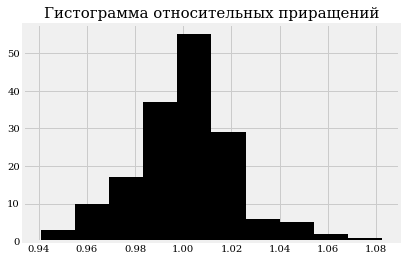

In [18]:
df_fin1['AFLT'].hist(color='black')
plt.title('Гистограмма относительных приращений', size=15 )

###  вычислить выборочные среднее, стандартное отклонение, эксцесс, коэффициент асимметрии.

In [19]:
def print_statistics(arr):
    df = pd.DataFrame({'Среднее' :[ stats.describe(arr)[2]],
                      'Стандартное отклонение' : [arr.std()],
                      'Коэффициент асимметрии набора данных': [stats.skew(arr)],
                      ' P- значение коэффициента асимметрии' : [stats.skewtest(arr)[1]],
                       'Коэффициент эксцесса' : [stats.kurtosis(arr)],
                      'Р- значение коэффициента эксцесса' : [stats.kurtosistest(arr)[1]],
                      'P- значение критерия нормальности' : [stats.normaltest(arr)[1]]}).T
    df.rename(columns={0: 'Статистический показатель'}, inplace=True)
    return df

In [33]:
print_statistics(df_fin1['AFLT'])

,Статистический показатель
Среднее,1.000773
Стандартное отклонение,0.021967
Коэффициент асимметрии набора данных,0.399485
P- значение коэффициента асимметрии,0.034749
Коэффициент эксцесса,1.367586
Р- значение коэффициента эксцесса,0.007292
P- значение критерия нормальности,0.002943


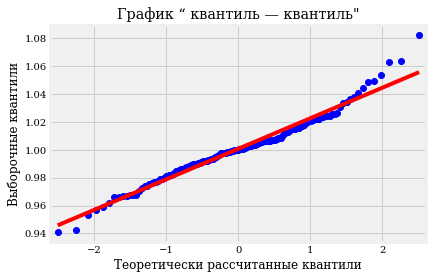

In [34]:
sm.qqplot(df_fin1['AFLT'], line= 's' )
plt.title('График “ квантиль — квантиль"')
plt.xlabel('Теоретически рассчитанные квантили')
plt.ylabel('Выборочные квантили');

### Вывод гипотеза о нормальном распределении отклоняется

### Тест других распределений

In [45]:
from statsmodels.stats.diagnostic import lilliefors


def kind_of_distribution(data, p_value =0.05):
   
    # Экспоненциальное распределение
    # If the pvalue is lower than some threshold, e.g. 0.05, 
    # then we can reject the Null hypothesis that the sample comes from a normal distribution.
    ksstat, pvalue_exp = lilliefors(data, dist='exp')
    
    # Логнормальное распределение
    _, pval_log = stats.shapiro(np.log(data))
    
    # Гамма распределение
    dist = stats.gamma
    args = dist.fit(data)
    k2, p_gamma = stats.kstest(data, dist.cdf, args)
    
    # датафрейм с результатами
    df = pd.DataFrame({'Тест распределения' :['Экспоненциальное', 
                                              'Логнормальное', 
                                              'Гамма распределение'],
                      'P-value' : [pvalue_exp, pval_log, p_gamma]})
    return df

In [46]:
kind_of_distribution(df_fin1['AFLT'])

,Тест распределения,P-value
0,Экспоненциальное,0.001000
1,Логнормальное,0.017578
2,Гамма распределение,0.304661


### Построить доверительный интервал для математического ожидания генеральной совокупности, соответствующий доверительной вероятности  . 

Text(0.5, 1.0, 'Построение доверительного интервала')

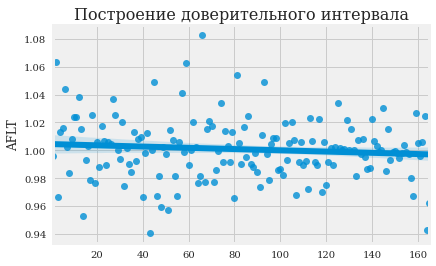

In [67]:

sns.regplot(y=df_fin1['AFLT'], x=data.index, data=df_fin1, ci=90)
plt.title('Построение доверительного интервала', size=16)